In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time
import timeit

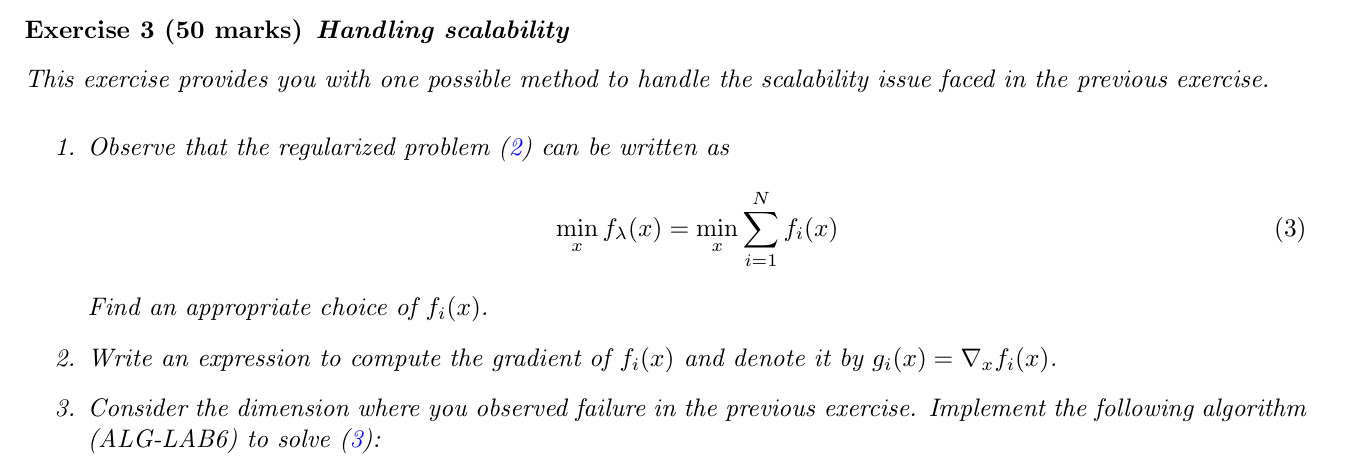

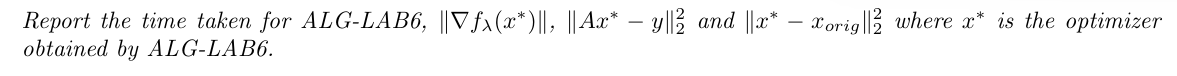

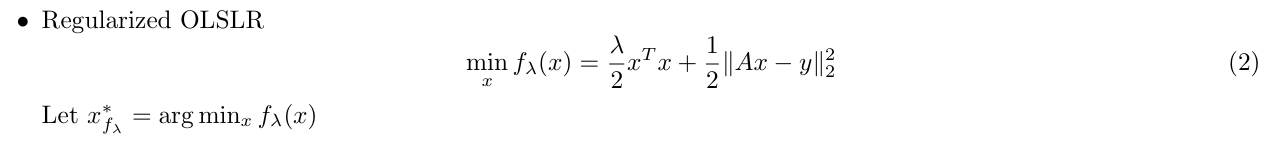

Part 1.

The regularized problem can be broken down into two components:
1. The data term: $\frac{1}{2}\|A x-y\|^2$
2. The regularization term: $\frac{\lambda}{2} x^Tx$

To transform it into a sum of individual loss functions, we can decompose the data term based on the individual data points. Let $\left(a_i, y_i\right)$ be the $i$ th data point in the dataset. Then, we can rewrite the data term as:
$$
\frac{1}{2}\|A x-y\|^2=\frac{1}{2} \sum_{i=1}^n\left\|a_i^T x-y_i\right\|^2
$$

Now, to achieve the desired form of $f_i(x)$, we can let:
$$
f_i(x)=\frac{1}{2}\left\|a_i^T x-y_i\right\|^2+\frac{\lambda}{2n} x^Tx
$$

Where:
- $f_i(x)$ is the loss associated with the $i$ th data point.

Note that we distributed the regularization term among all data points.

Also,

$$
\nabla{f(x)} = \nabla\frac{1}{2}\|A x-y\|^2 + \frac{\lambda}{2} x^Tx=\nabla\frac{1}{2} \sum_{i=1}^n\left\|a_i^T x-y_i\right\|^2 + \frac{\lambda}{2} x^Tx
$$

$$
 = \sum_{i=1}^n(a_i^T x-y_i)a_i + \lambda x
$$

Part 2:

$$
g_i(x) = \nabla{f_i(x)}=\nabla_x{ ( \frac{1}{2}\left\|a_i^T x-y_i\right\|^2+\frac{\lambda}{n} x^Tx )}
$$
$$
 = (a_i^Tx - y_i)a_i + \frac{\lambda}{n}x
$$

Part 3

In [17]:
#algo lab 6
np.random.seed(1000) #for repeatability
N = 200
d = 20000 #Consider the dimension which caused failure in the previous
lambda_reg = 0.001
eps = np.random.randn(N,1) #random noise
#Create data matrix, label vector
A = np.random.randn(N,d)
#Normalize the columns
for j in range(A.shape[1]):
  A[:,j] = A[:,j]/np.linalg.norm(A[:,j])
xorig = np.ones( (d,1) )
y = np.dot(A,xorig) + eps


In [18]:
A.shape

(200, 20000)

In [19]:
y.shape

(200, 1)

In [20]:
A[2,:].shape

(20000,)

In [21]:
def fx(x, lamda):
  return 0.5*norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_fx(x, lamda):
  sum = np.array([0. for _ in range(d)])
  for i in range(N):
    sum += (A[i]@x - y[i])[0]*A[i]
  sum += lamda*x
  return sum

In [7]:
#initialize the optimization variable to be used in the new algo ALG-LAB8
x = np.zeros((d,1))
x = x.flatten()
epochs = 10000 #initialize the number of rounds needed to process
t = 1
arr = np.arange(N) #index array
start = timeit.default_timer() #start the timer
for epoch in range(epochs):
  np.random.shuffle(arr) #shuffle every epoch
  for i in np.nditer(arr): #Pass through the data points
    gi = (A[i]@x - y[i])[0]*A[i] + (lambda_reg/N)*x
    x = x - (gi/t)
    # Update x using x <- x- 1/t * g_i (x)
    t = t+1
    if t>1e4:
      t = 1
alglab6time = timeit.default_timer()- start #time is in seconds
x_alglab6 = x
print("Total Epochs: ", epochs)
print("Time Taken: ", alglab6time)
print("Norm of Gradient at x* : ", norm(grad_fx(x_alglab6, lambda_reg)))
print("||Ax_alglab6- y||^2  : ",norm(A@x - y)**2)
print("||x_alglab6- xorig||^2 :   ", norm(x_alglab6 - xorig.flatten())**2)
#print the time taken, ||Ax_alglab6- y||^2, ||x_alglab6- xorig||^2

Total Epochs:  10000
Time Taken:  312.59011484300026
Norm of Gradient at x* :  0.012318516350085741
||Ax_alglab6- y||^2  :  6274934.393931907
||x_alglab6- xorig||^2 :    19847.919033137703


In [8]:
print("Optmizer is: ", x_alglab6[:10])

Optmizer is:  [-0.00636707  0.13744686 -0.01420191 -0.0389453  -0.05571273  0.12114317
  0.04081652 -0.00779623 -0.01824689 -0.03162918]


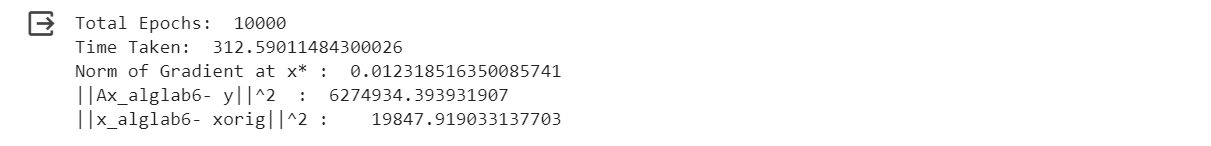

I have reported the values in above screenshot for 10000 epochs. We observe that gradient for the function is close to 0, (it is 0.01). Though optimal x obtained is different from xorig.

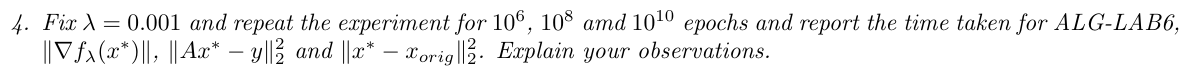

Edit: choosing, epochs as $10^3, 10^4, 10^5$

In [22]:
#we already have data for 10**4
epc = np.array([1e3, 1e5], dtype = int)
minimizerstore = []
#initialize the optimization variable to be used in the new algo ALG-LAB8
for epochs in epc:
  x = np.zeros((d,1))
  x = x.flatten()
  t = 1
  arr = np.arange(N) #index array
  start = timeit.default_timer() #start the timer
  for epoch in range(epochs):
    # print("epoch no.: ", epoch)
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      gi = (A[i]@x - y[i])[0]*A[i] + (lambda_reg/N)*x
      x = x - (gi/t)
      # Update x using x <- x- 1/t * g_i (x)
      t = t+1
      if t>1e4:
        t = 1
  alglab6time = timeit.default_timer()- start #time is in seconds
  x_alglab6 = x
  minimizerstore.append(x)
  print("Total Epochs: ", epochs)
  print("Time Taken: ", alglab6time)
  print("Norm of Gradient at x* : ", norm(grad_fx(x_alglab6, lambda_reg)))
  print("||Ax_alglab6- y||^2  : ",(norm(A@x_alglab6 - y))**2)
  print("||x_alglab6- xorig||^2 :   ", norm(x_alglab6 - xorig.flatten())**2)
  print("--------------------------------------------------------------------")
  #print the time taken, ||Ax_alglab6- y||^2, ||x_alglab6- xorig||^2

Total Epochs:  1000
Time Taken:  32.56950261199927
Norm of Gradient at x* :  0.01568795589324699
||Ax_alglab6- y||^2  :  6274940.204884397
||x_alglab6- xorig||^2 :    19847.919073461217
--------------------------------------------------------------------
Total Epochs:  100000
Time Taken:  2988.562688438
Norm of Gradient at x* :  0.014160059319672666
||Ax_alglab6- y||^2  :  6274941.166087591
||x_alglab6- xorig||^2 :    19847.91907563214
--------------------------------------------------------------------


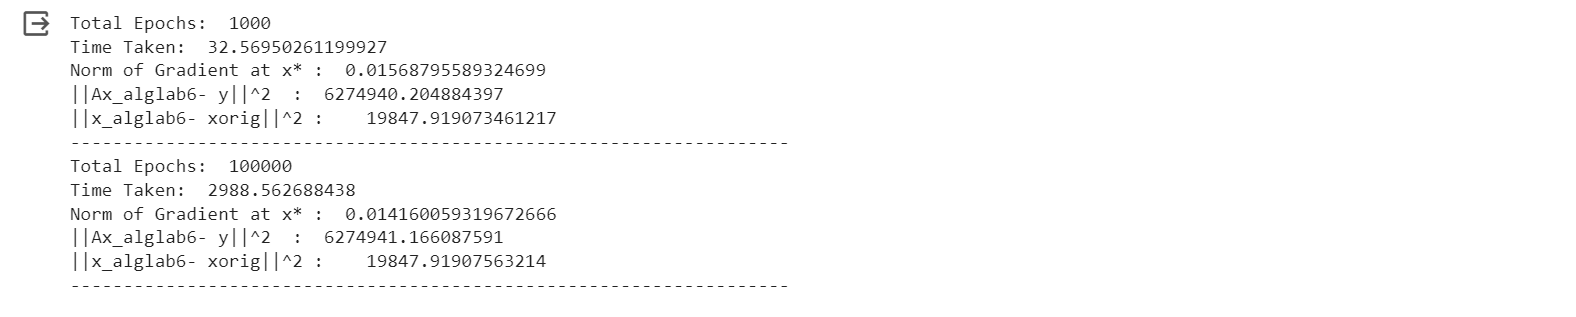

As we observe that for lower epochs, time taken is less. For both the epochs, the norms are almost similar. for both the minimizer and minimum.

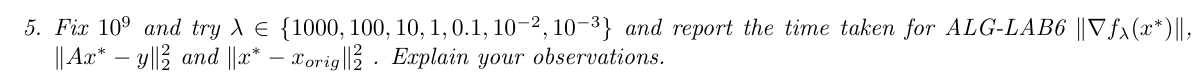

In [10]:
lamdas = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
epochs = 10000
#initialize the optimization variable to be used in the new algo ALG-LAB8
for lambda_reg in lamdas:
  x = np.zeros((d,1))
  x = x.flatten()
  t = 1
  arr = np.arange(N) #index array
  start = timeit.default_timer() #start the timer
  for epoch in range(epochs):
    # print("epoch no.: ", epoch)
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      gi = (A[i]@x - y[i])[0]*A[i] + (lambda_reg/N)*x
      x = x - (gi/t)
      # Update x using x <- x- 1/t * g_i (x)
      t = t+1
      if t>1e4:
        t = 1
  alglab6time = timeit.default_timer()- start #time is in seconds
  x_alglab6 = x
  print("Total Epochs: ", epochs)
  print("Lambda Regularizer taken: ", lambda_reg)
  print("Time Taken: ", alglab6time)
  print("Norm of Gradient at x* : ", norm(grad_fx(x_alglab6, lambda_reg)))
  print("||Ax_alglab6- y||^2  : ",(norm(A@x_alglab6 - y))**2)
  print("||x_alglab6- xorig||^2 :   ", (norm(x_alglab6 - xorig.flatten()))**2)
  print("--------------------------------------------------------------------")
  #print the time taken, ||Ax_alglab6- y||^2, ||x_alglab6- xorig||^2

Total Epochs:  10000
Lambda Regularizer taken:  1000
Time Taken:  304.5486209169999
Norm of Gradient at x* :  10.847202993577577
||Ax_alglab6- y||^2  :  3168744.290929384
||x_alglab6- xorig||^2 :    19972.92949485242
--------------------------------------------------------------------
Total Epochs:  10000
Lambda Regularizer taken:  100
Time Taken:  296.34972489399934
Norm of Gradient at x* :  34.64106767887467
||Ax_alglab6- y||^2  :  3974679.4250986995
||x_alglab6- xorig||^2 :    19883.218667017463
--------------------------------------------------------------------
Total Epochs:  10000
Lambda Regularizer taken:  10
Time Taken:  299.90377304199956
Norm of Gradient at x* :  103.56498966687
||Ax_alglab6- y||^2  :  5874859.202221942
||x_alglab6- xorig||^2 :    19849.16304977627
--------------------------------------------------------------------
Total Epochs:  10000
Lambda Regularizer taken:  1
Time Taken:  305.4333955719994
Norm of Gradient at x* :  25.93787010524759
||Ax_alglab6- y||^2 

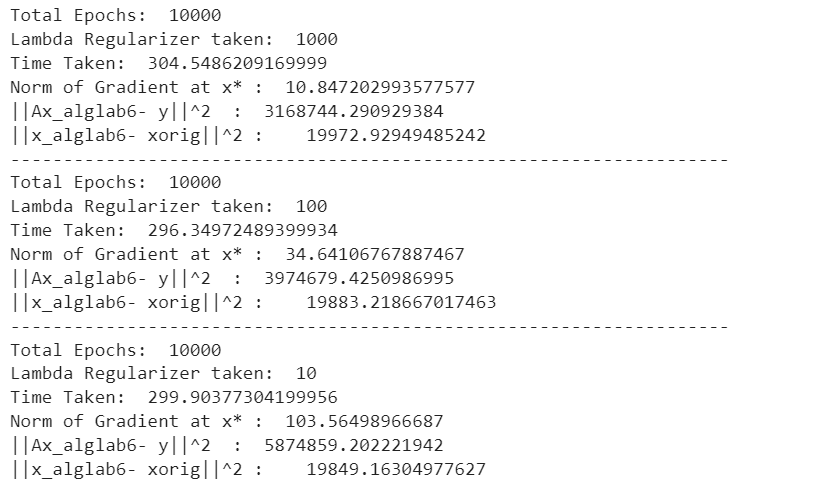

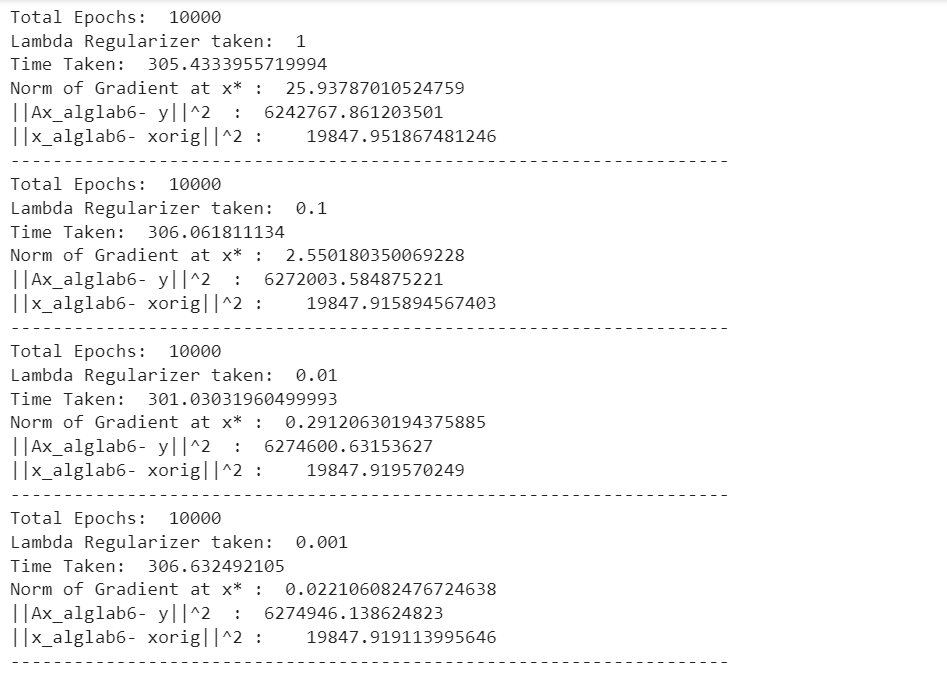

As observed as we decrease $\lambda_{reg}$ first the norm of gradient increases but after that the norm of the gradient starts decreases. The norm of $x_{orig}-x_{optimal}$ stays almost the same. Time taken is also almost similar around 300 seconds. Total epochs taken are 10000.

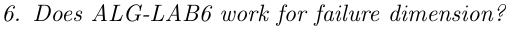

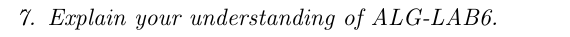

Part 6 and 7 combined

ALG-LAB6 is actually a version of Stochastic Gradient Descent. It works for failure dimension beacuse instead of learning from all training points at once, it tries to optimizing by taking one data point at a time.
Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used to minimize objective functions that can be expressed as a sum of differentiable functions. It's particularly well-suited for large-scale machine learning problems, where the dataset might be too large to fit into memory.

Stochasticity: SGD introduces randomness by considering only one data point (or a small subset) to compute the gradient at each iteration. This randomness can help the algorithm escape local minima and saddle points. We also reset the t value after few iterations In the provided code, t is used as a counter that increments by 1 for each iteration through the data points. After a certain threshold (in this case, when t exceeds > 1e4), instead of allowing t to continue growing, it is reset to 1.
This resetting of t essentially creates a cyclic behavior where the counter restarts after reaching a certain value. This technique can be useful for various reasons, such as preventing numerical overflow of t, providing a cyclic behavior for certain algorithms, or potentially ensuring a periodic behavior in the optimization process.

By using mini-batches, SGD can exploit parallelism in modern computing architectures, making it computationally efficient. While the stochastic nature of SGD might lead to noisy updates, over a sufficient number of iterations, SGD typically converges to a solution that approximates the true minimum of the objective function.

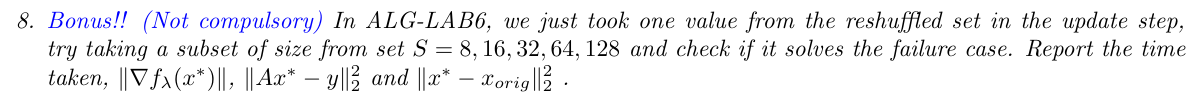

In [26]:
S = [8,16,32,64,128]

In [32]:
for s in S:
  #initialize the optimization variable to be used in the new algo ALG-LAB8
  x = np.zeros((d,1))
  x = x.flatten()
  epochs = 1000 #initialize the number of rounds needed to process
  t = 1
  arr = np.arange(N) #index array
  start = timeit.default_timer() #start the timer
  for epoch in range(epochs):
    np.random.shuffle(arr) #shuffle every epoch
    i = 0
    steps = N//s
    while steps>0:
      gi = np.array([0. for _ in range(len(x))])
      for _ in range(s):
        gi +=  (A[arr[i]]@x - y[arr[i]])[0]*A[arr[i]] + (lambda_reg/N)*x
        i+=1
      #update step
      x = x - (gi/t)
      t += 1
      if t>1e4:
        t = 1
      steps -= 1

  alglab6time = timeit.default_timer()- start #time is in seconds
  x_alglab6 = x
  print("Total Epochs: ", epochs)
  print("MiniBatch Size taken: ", s)
  print("Time Taken: ", alglab6time)
  print("Norm of Gradient at x* : ", norm(grad_fx(x_alglab6, lambda_reg)))
  print("||Ax_alglab6- y||^2  : ",norm(A@x - y)**2)
  print("||x_alglab6- xorig||^2 :   ", norm(x_alglab6 - xorig.flatten())**2)
  #print the time taken, ||Ax_alglab6- y||^2, ||x_alglab6- xorig||^2

Total Epochs:  1000
MiniBatch Size taken:  8
Time Taken:  118.42891113800215
Norm of Gradient at x* :  0.00015951551352969256
||Ax_alglab6- y||^2  :  6274918.032432068
||x_alglab6- xorig||^2 :    19847.919080292046
Total Epochs:  1000
MiniBatch Size taken:  16
Time Taken:  65.77807368199865
Norm of Gradient at x* :  0.0005296903205656554
||Ax_alglab6- y||^2  :  6274918.820848597
||x_alglab6- xorig||^2 :    19847.91908116404
Total Epochs:  1000
MiniBatch Size taken:  32
Time Taken:  43.55746817199906
Norm of Gradient at x* :  0.0002236003778852954
||Ax_alglab6- y||^2  :  6274917.732234449
||x_alglab6- xorig||^2 :    19847.919079911688
Total Epochs:  1000
MiniBatch Size taken:  64
Time Taken:  31.91005600099743
Norm of Gradient at x* :  0.00039225436295740385
||Ax_alglab6- y||^2  :  6274917.979792678
||x_alglab6- xorig||^2 :    19847.922198513414
Total Epochs:  1000
MiniBatch Size taken:  128
Time Taken:  16.234460092000518
Norm of Gradient at x* :  470796522.71502167
||Ax_alglab6- y||^2